<a href="https://colab.research.google.com/github/belikeamitesh/CS306-Machine-Learning/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
iris = datasets.load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data,columns=[iris.feature_names])
df['target'] = iris.target

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df = df.drop(range(100,150,1))

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

In [ ]:
dat = scaling.fit_transform(df[df.columns])
df = pd.DataFrame(dat)

In [ ]:
train = df.sample(frac=0.3)
temp = df.drop(train.index)
validation = temp.sample(frac=0.4/0.7)
test = temp.drop(validation.index)

In [ ]:
df

,0,1,2,3,4
0,0.296296,0.625000,0.097561,0.058824,0.0
1,0.222222,0.416667,0.097561,0.058824,0.0
2,0.148148,0.500000,0.073171,0.058824,0.0
3,0.111111,0.458333,0.121951,0.058824,0.0
4,0.259259,0.666667,0.097561,0.058824,0.0
...,...,...,...,...,...
95,0.518519,0.416667,0.780488,0.647059,1.0
96,0.518519,0.375000,0.780488,0.705882,1.0
97,0.703704,0.375000,0.804878,0.705882,1.0
98,0.296296,0.208333,0.487805,0.588235,1.0


In [ ]:
import math

In [ ]:
def hypothesis(w,x):
  y=w[0]
  for i in range(4):
    y = y + np.array(w[i+1])*x[:,i]
  gx = 1/(1+(math.e)**(-1*y))
  return gx

In [ ]:
def mse(w,x_dataset, y_dataset):
  t =  np.mean((hypothesis(w,x_dataset)-y_dataset)**2)/2
  return t

In [ ]:
def logfun(arr):
  lst = []
  for i in range(len(arr)):
    lst.append(math.log(arr[i]))
  return np.array(lst)

In [ ]:
def logLoss(w,x_dataset,y_dataset):
  hx = hypothesis(w,x_dataset)
  y = np.mean(((-1*y_dataset*logfun(hx)) - ((1-y_dataset)*logfun(1-hx))))
  return y

In [ ]:
def update_coeff(w,indx,alpha,x_dataset,y_dataset,hx):
  if indx is 0:
    xij = 1
  else:
    xij = x_dataset[:,indx-1]
  wj = w[indx] - np.sum(((hx - y_dataset)*xij))*(alpha/len(x_dataset))
  return wj

In [ ]:
def print_mse(dataset,alpha,rho,epoch):
  x = np.array(dataset.iloc[:,:4])
  y = np.array(dataset.iloc[:,4:])
  i=0
  diff=9999999
  current_mse=9999999
  while diff>rho and i < epoch:
    hx = hypothesis(w,x)
    w0 = update_coeff(w,0,alpha,x,y,hx)
    w1 = update_coeff(w,1,alpha,x,y,hx)
    w2 = update_coeff(w,2,alpha,x,y,hx)
    w3 = update_coeff(w,3,alpha,x,y,hx)
    w4 = update_coeff(w,4,alpha,x,y,hx)
    w[0] = w0
    w[1] = w1
    w[2] =w2
    w[3] = w3
    w[4] = w4
    i = i+1
    temp = mse(w,x,y)
    diff = current_mse - temp
    current_mse = temp
  current_mse = mse(w,x,y)
  print("MSE for","Learning rate : {}".format(alpha),"rho : {}".format(rho),"epoch : {}".format(epoch),"is",current_mse)
  #return current_mse


In [ ]:
def print_logloss(dataset,alpha,rho,epoch):
  x = np.array(dataset.iloc[:,:4])
  y = np.array(dataset.iloc[:,4:])
  i=0
  diff=9999999
  current_logloss=9999999
  while diff > rho and i < epoch:
    hx = hypothesis(w,x)
    w0 = update_coeff(w,0,alpha,x,y,hx)
    w1 = update_coeff(w,1,alpha,x,y,hx)
    w2 = update_coeff(w,2,alpha,x,y,hx)
    w3 = update_coeff(w,3,alpha,x,y,hx)
    w4 = update_coeff(w,4,alpha,x,y,hx)
    w[0] = w0
    w[1] = w1
    w[2] =w2
    w[3] = w3
    w[4] = w4
    i = i+1
    temp = logLoss(w,x,y)
    diff = current_logloss - temp
    current_logloss = temp
  current_logloss = logLoss(w,x,y)
  print("Log Loss for","Learning rate : {}".format(alpha),"rho : {}".format(rho),"epoch : {}".format(epoch),"is",current_logloss)
  #return current_mse

In [ ]:
w = [1,1,1,1,1]
print_mse(validation,0.1,0.1,10)
w = [1,1,1,1,1]
print_mse(validation,0.01,0.01,20)
w = [1,1,1,1,1]
print_mse(validation,0.05,0.01,30)
w = [1,1,1,1,1]
print_mse(validation,0.001,0.01,40)
w = [1,1,1,1,1]
print_mse(validation,0.2,0.01,40)
w = [1,1,1,1,1]
print_mse(validation,0.05,0.001,40)

MSE for Learning rate : 0.1 rho : 0.1 epoch : 10 is 0.1279874094857084
MSE for Learning rate : 0.01 rho : 0.01 epoch : 20 is 0.20004013000050236
MSE for Learning rate : 0.05 rho : 0.01 epoch : 30 is 0.12605278723781993
MSE for Learning rate : 0.001 rho : 0.01 epoch : 40 is 0.21600180938245336
MSE for Learning rate : 0.2 rho : 0.01 epoch : 40 is 0.2280170962134315
MSE for Learning rate : 0.05 rho : 0.001 epoch : 40 is 0.12587195395154588


In [ ]:
w = [1,1,1,1,1]
print_logloss(validation,0.1,0.1,10)
w = [1,1,1,1,1]
print_logloss(validation,0.01,0.01,20)
w = [1,1,1,1,1]
print_logloss(validation,0.05,0.01,30)
w = [1,1,1,1,1]
print_logloss(validation,0.001,0.01,40)
w = [1,1,1,1,1]
print_logloss(validation,0.2,0.01,40)
w = [1,1,1,1,1]
print_logloss(validation,0.05,0.001,40)

Log Loss for Learning rate : 0.1 rho : 0.1 epoch : 10 is 0.7054640481475224
Log Loss for Learning rate : 0.01 rho : 0.01 epoch : 20 is 0.7168981230419927
Log Loss for Learning rate : 0.05 rho : 0.01 epoch : 30 is 0.6973908397742963
Log Loss for Learning rate : 0.001 rho : 0.01 epoch : 40 is 1.1097636779735534
Log Loss for Learning rate : 0.2 rho : 0.01 epoch : 40 is 1.6922327499499108
Log Loss for Learning rate : 0.05 rho : 0.001 epoch : 40 is 0.6966575204029707


In [ ]:
w = [1,1,1,1,1]
print_logloss(validation,0.05,0.01,100)

Log Loss for Learning rate : 0.05 rho : 0.01 epoch : 100 is 0.6973908397742963


In [ ]:
dff = pd.DataFrame(threshold(hypothesis(w,np.array(validation.iloc[:,:4]))),columns=["hypothesis"])
dff["Actual"] = np.array(validation.iloc[:,4:])

In [ ]:
dff

In [ ]:
def threshold(arr):
  lst = []
  for i in range(len(arr)):
    if arr[i] >= 0.5:
      lst.append(1)
    else:
      lst.append(0)
  return lst

In [ ]:
import matplotlib.pyplot as plt


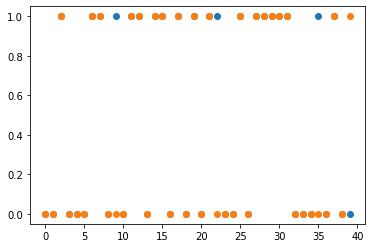

In [ ]:
plt.scatter(range(40),np.array(validation.iloc[:,4:]))
plt.scatter(range(40),threshold(hypothesis(w,np.array(validation.iloc[:,:4]))))

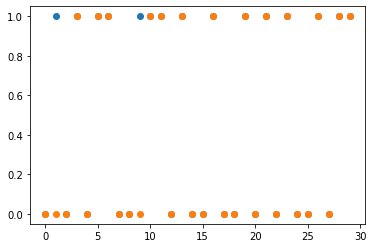

In [ ]:
plt.scatter(range(30),np.array(train.iloc[:,4:]))
plt.scatter(range(30),threshold(hypothesis(w,np.array(train.iloc[:,:4]))))

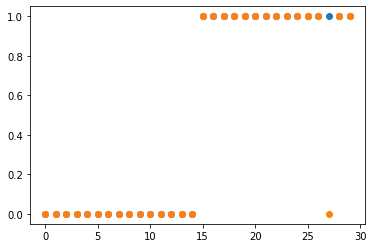

In [ ]:
plt.scatter(range(30),np.array(test.iloc[:,4:]))
plt.scatter(range(30),threshold(hypothesis(w,np.array(test.iloc[:,:4]))))